threshold: 0.10, branching_factor: 20 -> Number of clusters: 3
threshold: 0.10, branching_factor: 30 -> Number of clusters: 3
threshold: 0.10, branching_factor: 40 -> Number of clusters: 3
threshold: 0.10, branching_factor: 50 -> Number of clusters: 3
threshold: 0.20, branching_factor: 20 -> Number of clusters: 3
threshold: 0.20, branching_factor: 30 -> Number of clusters: 3
threshold: 0.20, branching_factor: 40 -> Number of clusters: 3
threshold: 0.20, branching_factor: 50 -> Number of clusters: 3
threshold: 0.30, branching_factor: 20 -> Number of clusters: 3
threshold: 0.30, branching_factor: 30 -> Number of clusters: 3
threshold: 0.30, branching_factor: 40 -> Number of clusters: 3
threshold: 0.30, branching_factor: 50 -> Number of clusters: 3
threshold: 0.40, branching_factor: 20 -> Number of clusters: 3
threshold: 0.40, branching_factor: 30 -> Number of clusters: 3
threshold: 0.40, branching_factor: 40 -> Number of clusters: 3
threshold: 0.40, branching_factor: 50 -> Number of clus

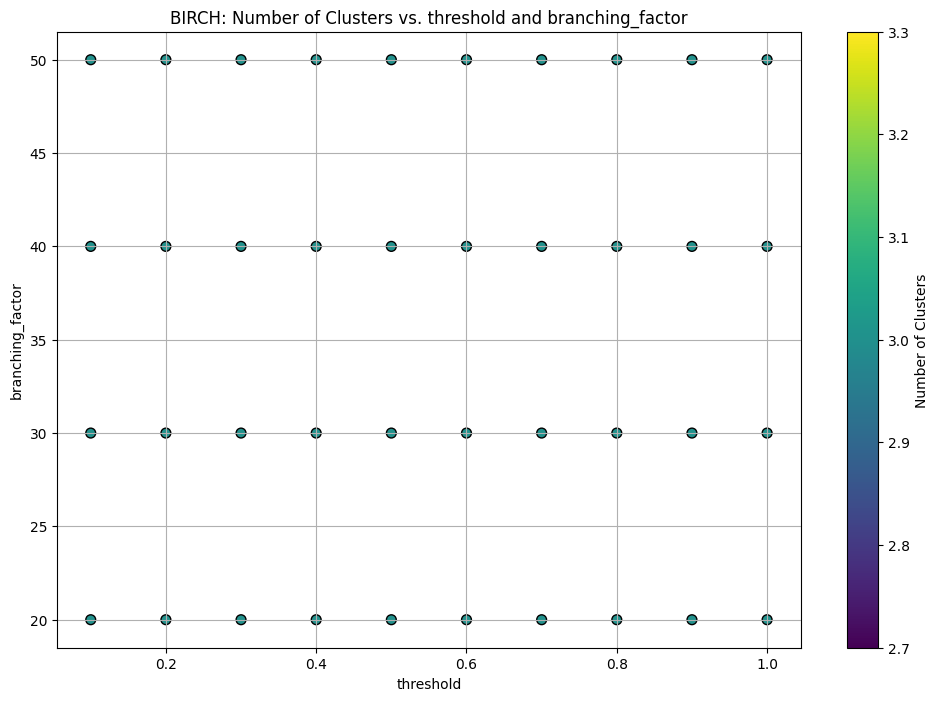

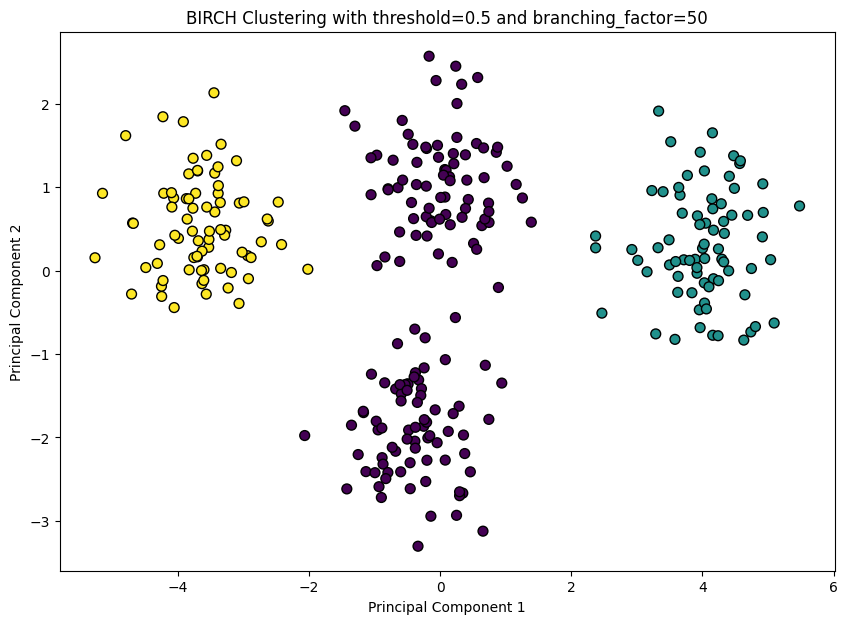

In [1]:
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Example dataset creation
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Define a range of threshold values to test
threshold_values = np.linspace(0.1, 1.0, 10)
branching_factor_values = range(20, 60, 10)

# Initialize lists to store results
threshold_list = []
branching_factor_list = []
num_clusters_list = []

# Perform BIRCH for each combination of threshold and branching_factor
for threshold in threshold_values:
    for branching_factor in branching_factor_values:
        birch = Birch(threshold=threshold, branching_factor=branching_factor)
        labels = birch.fit_predict(X)
        
        # Number of clusters found (excluding noise)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        threshold_list.append(threshold)
        branching_factor_list.append(branching_factor)
        num_clusters_list.append(num_clusters)
        
        # Optional: Print or store the number of clusters for each threshold and branching_factor
        print(f'threshold: {threshold:.2f}, branching_factor: {branching_factor} -> Number of clusters: {num_clusters}')

# Plotting the number of clusters for each combination of threshold and branching_factor
plt.figure(figsize=(12, 8))
plt.scatter(threshold_list, branching_factor_list, c=num_clusters_list, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label='Number of Clusters')
plt.title('BIRCH: Number of Clusters vs. threshold and branching_factor')
plt.xlabel('threshold')
plt.ylabel('branching_factor')
plt.grid(True)
plt.show()

# Use a specific combination of threshold and branching_factor (for example, threshold=0.5 and branching_factor=50)
best_threshold = 0.5
best_branching_factor = 50
birch = Birch(threshold=best_threshold, branching_factor=best_branching_factor)
labels = birch.fit_predict(X)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
plt.title(f'BIRCH Clustering with threshold={best_threshold} and branching_factor={best_branching_factor}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
